In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats,integrate
%matplotlib inline

In [14]:
def sinplot(flip=1):
    x=np.linspace(0,14,100)
    for i in range(1,7):
        plt.plot(x,np.sin(x+i*0.5)*(7-i)*flip)

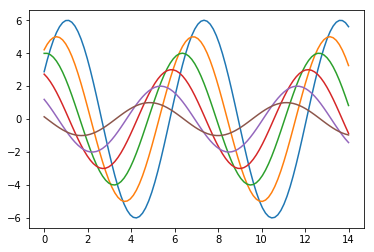

In [15]:
sinplot()

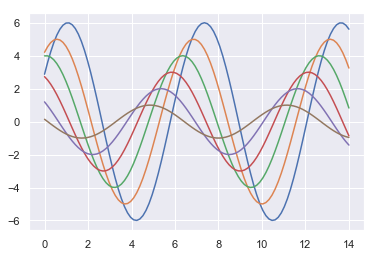

In [16]:
sns.set()
sinplot()

## 5种风格
+ darkgrid
+ whitegrid
+ dark
+ white
+ ticks

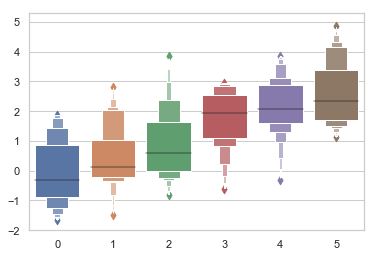

In [18]:
sns.set_style('whitegrid')
data=np.random.normal(size=(20,6))+np.arange(6)/2
sns.boxenplot(data=data)

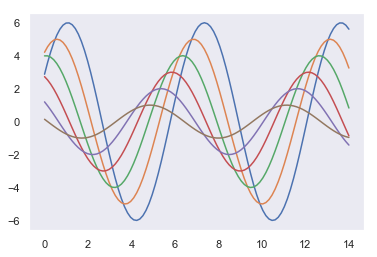

In [21]:
sns.set_style("dark")
sinplot()

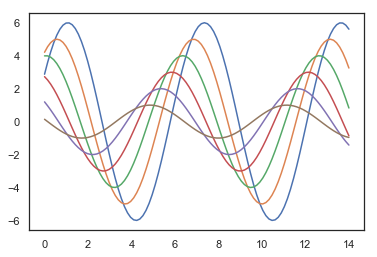

In [22]:
sns.set_style("white")
sinplot()

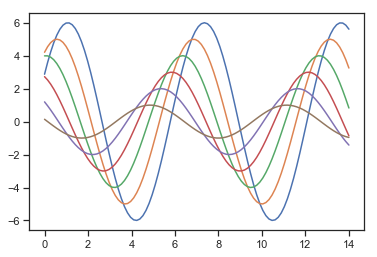

In [23]:
sns.set_style("ticks")
sinplot()

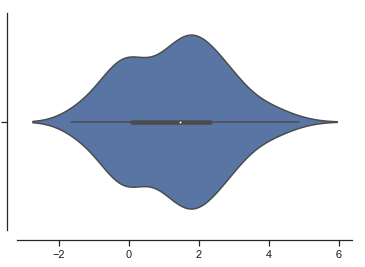

In [24]:
sns.violinplot(data)
sns.despine(offset=10)#轴线距离

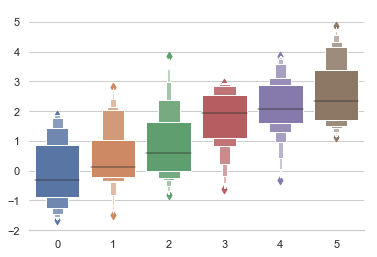

In [27]:
sns.set_style("whitegrid")
sns.boxenplot(data=data,palette="deep")
sns.despine(left=True)

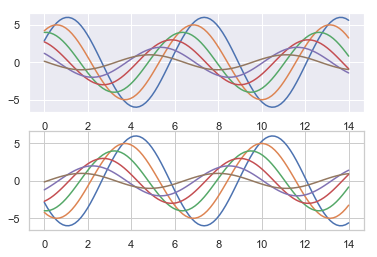

In [28]:
with sns.axes_style("darkgrid"):
    plt.subplot(211)
    sinplot()
plt.subplot(212)
sinplot(-1)

## 设置布局
+ paper
+ talk
+ poster
+ notebook

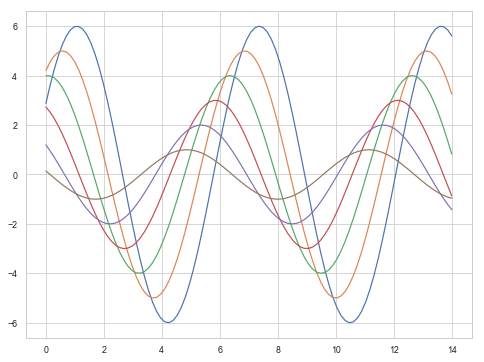

In [29]:
sns.set_context('paper')
plt.figure(figsize=(8,6))
sinplot()

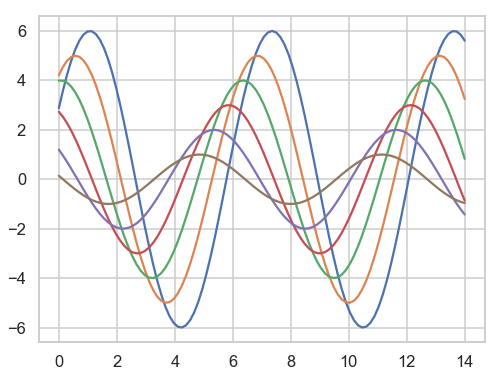

In [30]:
sns.set_context('talk')
plt.figure(figsize=(8,6))
sinplot()

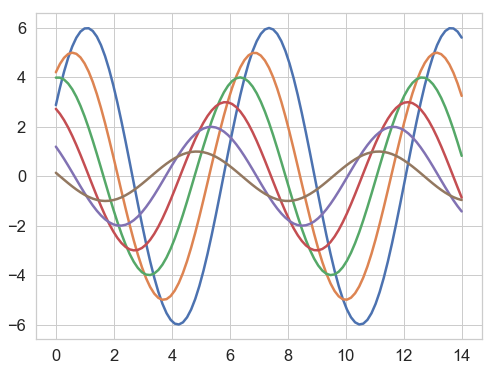

In [31]:
sns.set_context('notebook',font_scale=1.5,rc={"lines.linewidth":2.5})
plt.figure(figsize=(8,6))
sinplot()

##  调色板

In [3]:
sns.set(rc={'figure.figsize':(6,6)})

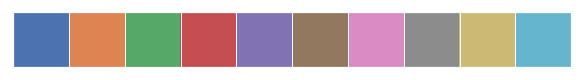

In [4]:
current_palette=sns.color_palette()
sns.palplot(current_palette)

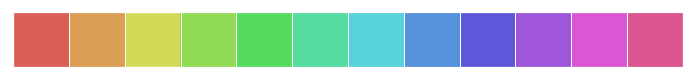

In [7]:
sns.palplot(sns.color_palette('hls',12))

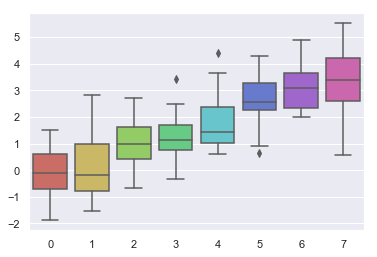

In [18]:
data=np.random.normal(size=(20,8))+np.arange(8)/2
sns.boxplot(data=data,palette=sns.color_palette('hls',8))

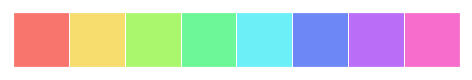

In [21]:
sns.palplot(sns.hls_palette(8,l=.7,s=.9))

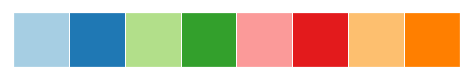

In [22]:
sns.palplot(sns.color_palette('Paired',8))

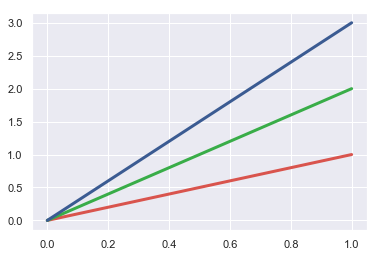

In [25]:
plt.plot([0,1],[0,1],sns.xkcd_rgb['pale red'],lw=3)
plt.plot([0,1],[0,2],sns.xkcd_rgb['medium green'],lw=3)
plt.plot([0,1],[0,3],sns.xkcd_rgb['denim blue'],lw=3)

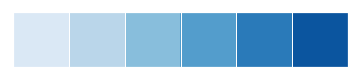

In [29]:
#连续性色板
sns.palplot(sns.color_palette('Blues'))

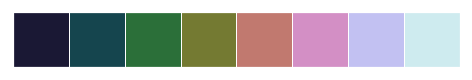

In [30]:
sns.palplot(sns.color_palette('cubehelix',8))

## 单变量分析图


+ 直方图

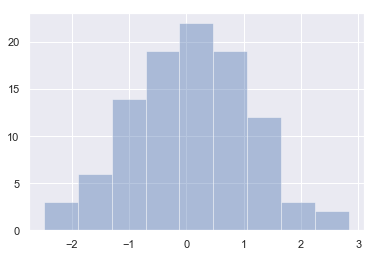

In [32]:
x=np.random.normal(size=100)
sns.distplot(x,kde=False)

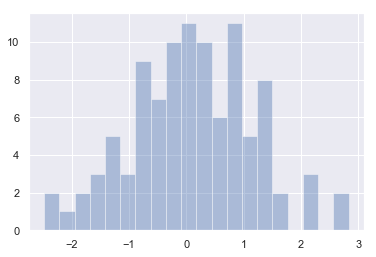

In [33]:
sns.distplot(x,bins=20,kde=False)

+ 查看数据分布

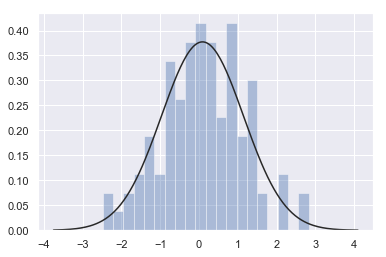

In [39]:
sns.distplot(x,bins=20,kde=False,fit=stats.gamma)

## 二维数据

In [16]:
mean,cov=[0,1],[(1,.5),(.5,1)]
data=np.random.multivariate_normal(mean,cov,200)
df=pd.DataFrame(data,columns=['x','y'])

+ 散点图

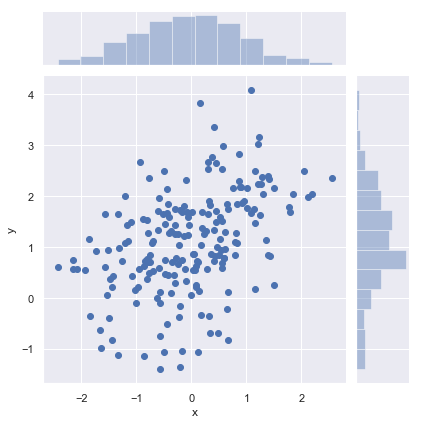

In [45]:
sns.jointplot(x='x',y='y',data=df)

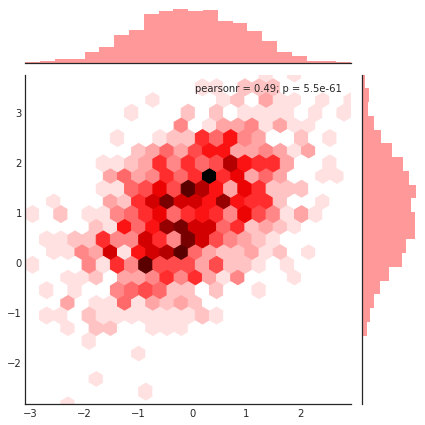

In [19]:
x,y=np.random.multivariate_normal(mean,cov,1000).T
with sns.axes_style('white'):
    sns.jointplot(x=x,y=y,kind='hex',color='r')

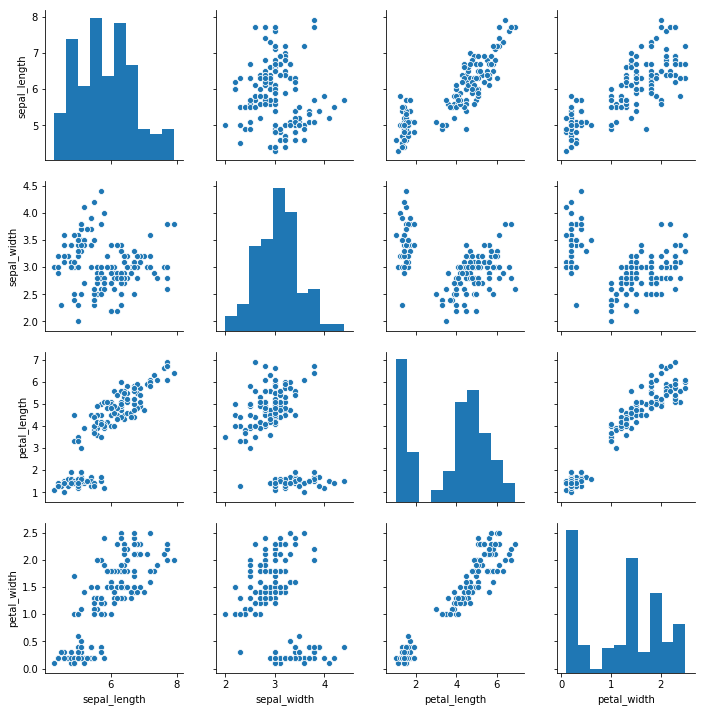

In [63]:
iris=sns.load_dataset('iris')
sns.pairplot(iris) #多个变量之间每两个关系

## 回归分析 regplot()和implot()

In [20]:
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


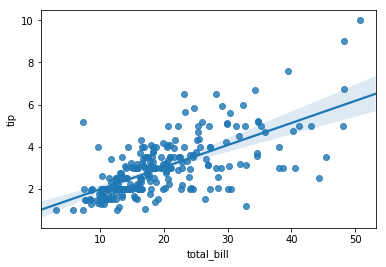

In [6]:
sns.regplot(x='total_bill',y='tip',data=tips)

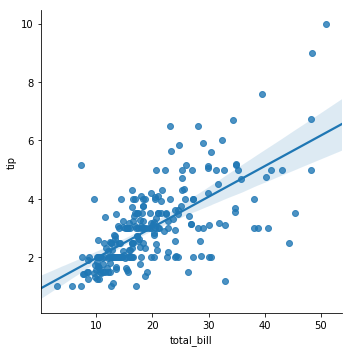

In [8]:
sns.lmplot(x='total_bill',y='tip',data=tips)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


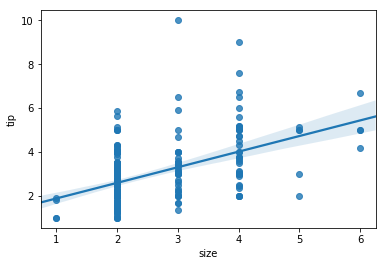

In [11]:
sns.regplot(data=tips,x='size',y='tip')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


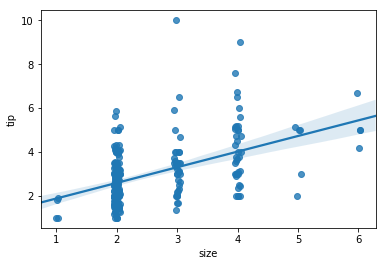

In [12]:
sns.regplot(data=tips,x='size',y='tip',x_jitter=0.05) #原始数据增加偏移

## 多变量分析

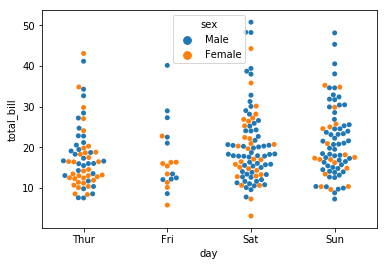

In [22]:
sns.swarmplot(x='day',y='total_bill',hue='sex',data=tips) #颜色反映第三维度

+ 箱线图

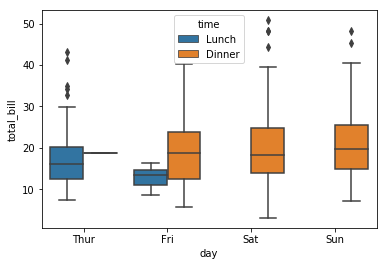

In [24]:
sns.boxplot(x='day',y='total_bill',hue='time',data=tips)  #IQR=Q3-Q1  Q3+1.5IQR Q1-1.5IQR则为离群点

+ 小提琴图

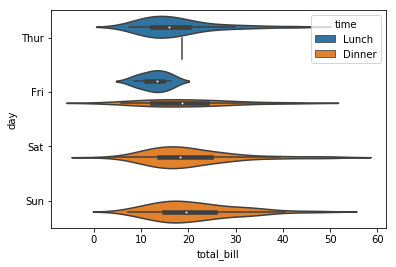

In [29]:
sns.violinplot(x='total_bill',y='day',hue='time',data=tips)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


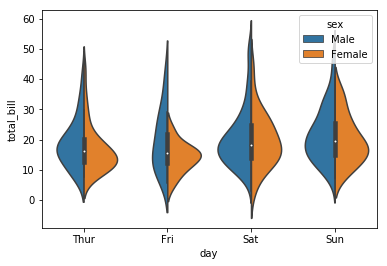

In [28]:
sns.violinplot(x='day',y='total_bill',hue='sex',data=tips,split=True)

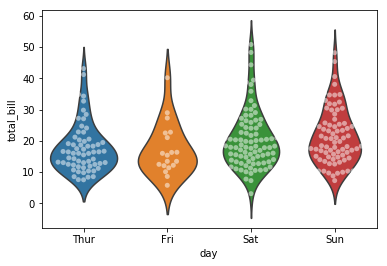

In [30]:
sns.violinplot(x='day',y='total_bill',data=tips,inner=None)
sns.swarmplot(x='day',y='total_bill',data=tips,color='w',alpha=.5)

+ 条形图

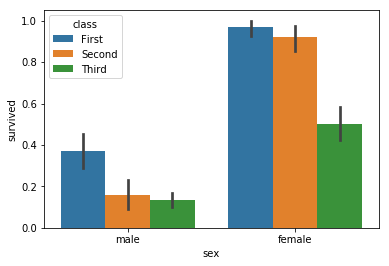

In [5]:
titanic=sns.load_dataset('titanic')
sns.barplot(x='sex',y='survived',hue='class',data=titanic) #hue以什么为区分

+ 点图、折线图

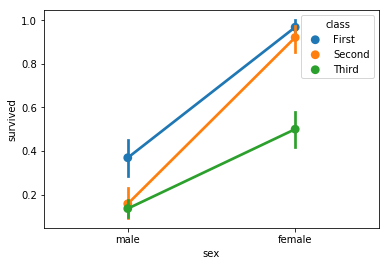

In [6]:
sns.pointplot(x='sex',y='survived',hue='class',data=titanic)

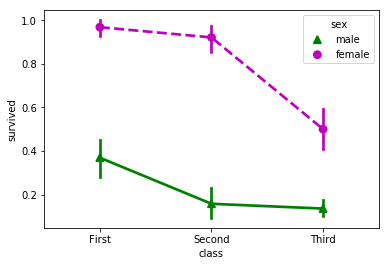

In [17]:
sns.pointplot(x='class',y='survived',hue='sex',data=titanic,
           palette={'male':'g','female':'m'},
              markers=['^','o'],linestyles=['-','--']           )

+ 多层面板分类图

/Users/wolf/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


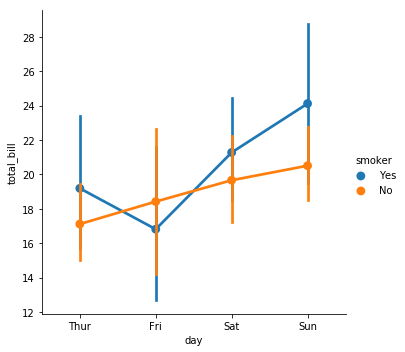

In [21]:
sns.factorplot(x='day',y='total_bill',hue='smoker',data=tips)

/Users/wolf/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


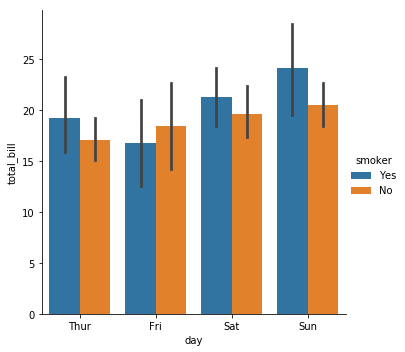

In [22]:
sns.factorplot(x='day',y='total_bill',hue='smoker',data=tips,kind='bar')

/Users/wolf/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


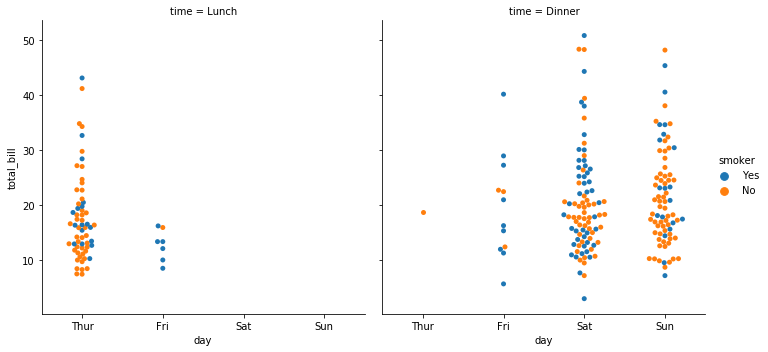

In [23]:
sns.factorplot(x='day',y='total_bill',hue='smoker',col='time',data=tips,kind='swarm')

/Users/wolf/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


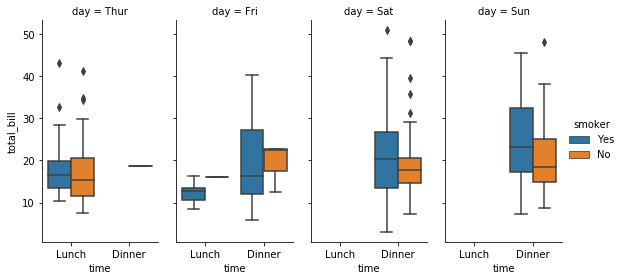

In [30]:
sns.factorplot(x='time',y='total_bill',hue='smoker',col='day',data=tips,kind='box',height=4,aspect=.5)

## Facetgrid 使用方法

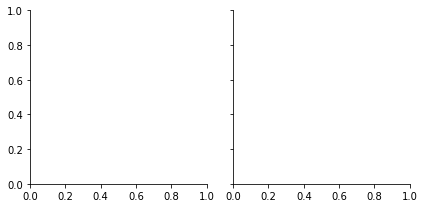

In [38]:
g=sns.FacetGrid(tips,col='time')

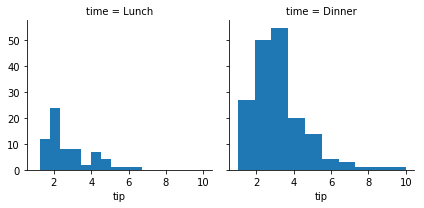

In [40]:
g=sns.FacetGrid(tips,col='time')
g.map(plt.hist,'tip')

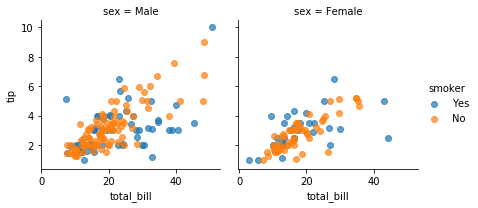

In [53]:
g=sns.FacetGrid(tips,col='sex',hue='smoker')
g.map(plt.scatter,'total_bill','tip',alpha=.7)
g.add_legend()

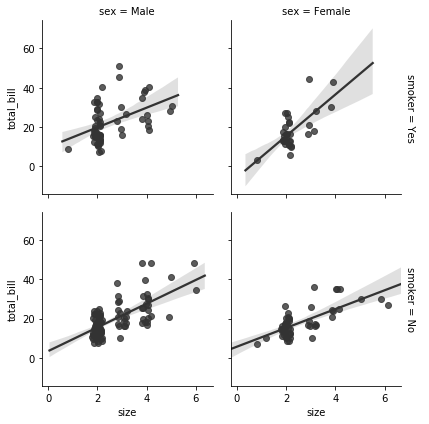

In [57]:
g=sns.FacetGrid(tips,row='smoker',col='sex',margin_titles=True)
g.map(sns.regplot,'size','total_bill',color='.2',fit_reg=True,x_jitter=.2)
g.add_legend()

/Users/wolf/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


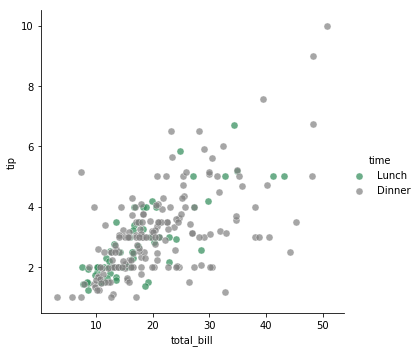

In [59]:
pal=dict(Lunch='seagreen',Dinner='gray')
g=sns.FacetGrid(tips,hue='time',palette=pal,size=5)
g.map(plt.scatter,'total_bill','tip',s=50,alpha=.7,linewidth=.5,edgecolor='white')
g.add_legend()

/Users/wolf/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


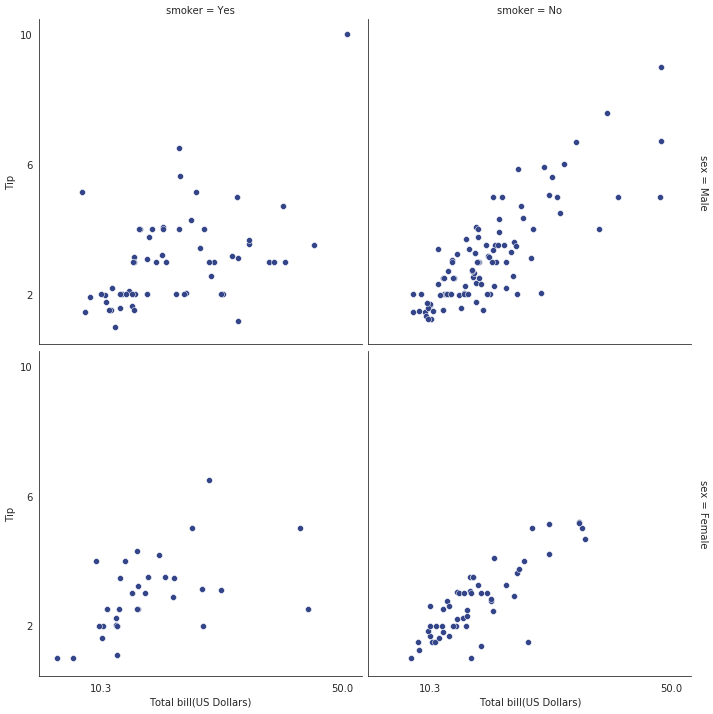

In [61]:
with sns.axes_style('white'):
    g=sns.FacetGrid(tips,row='sex',col='smoker',margin_titles=True,size=5)
    g.map(plt.scatter,'total_bill','tip',color='#334488',edgecolor='white',lw=.5)
    g.set_axis_labels('Total bill(US Dollars)','Tip')
    g.set(xticks=[10.30,50],yticks=[2,6,10])
    g.fig.subplots_adjust(wspace=.02,hspace=.02)

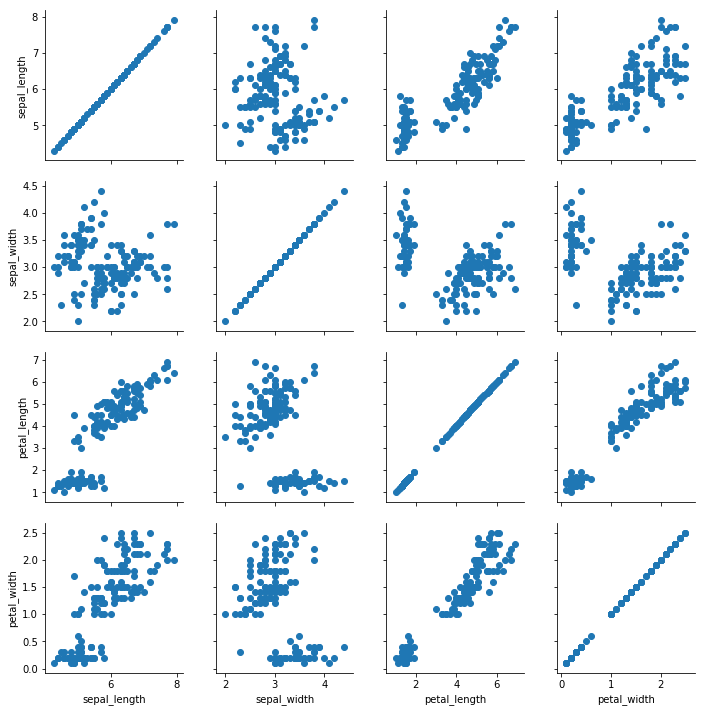

In [65]:
g=sns.PairGrid(iris)
g.map(plt.scatter)

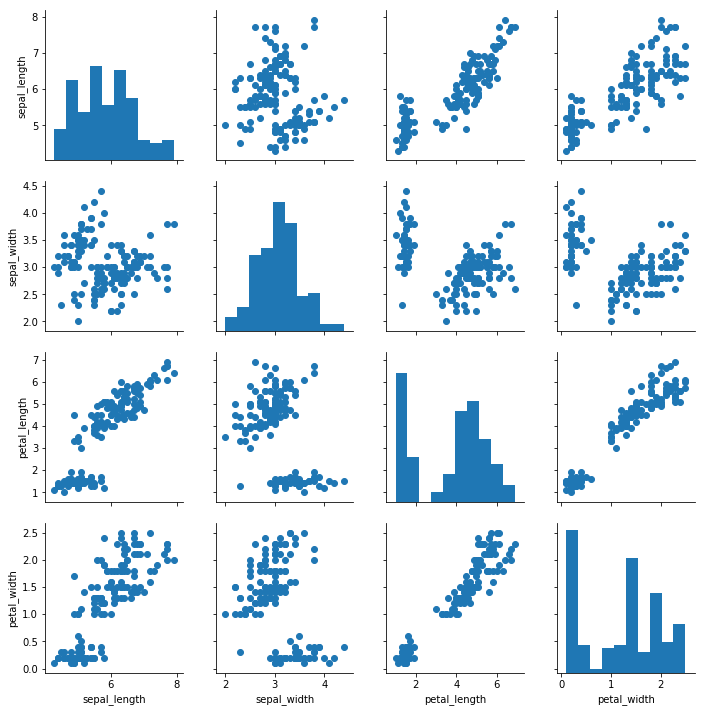

In [66]:
g=sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

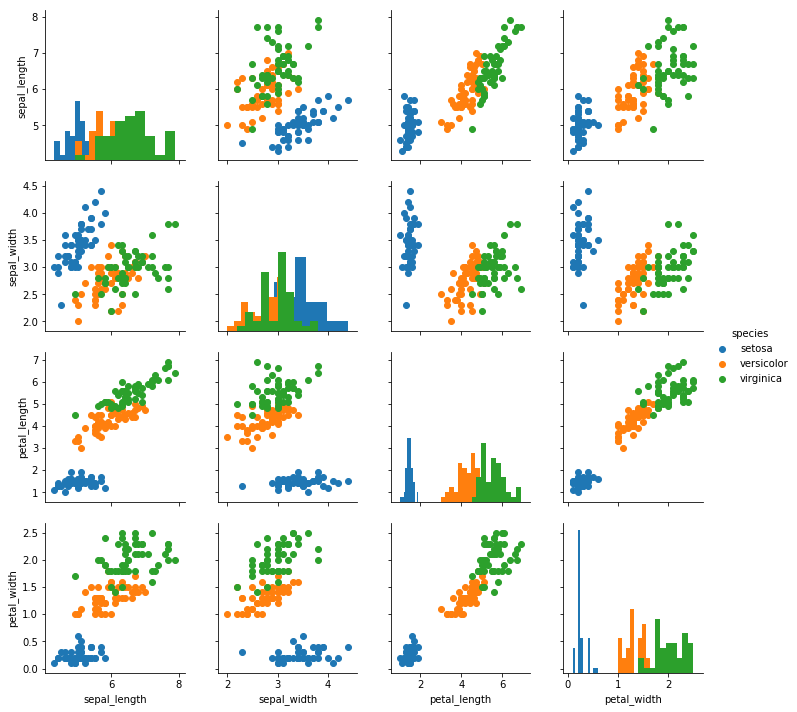

In [68]:
g=sns.PairGrid(iris,hue='species')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

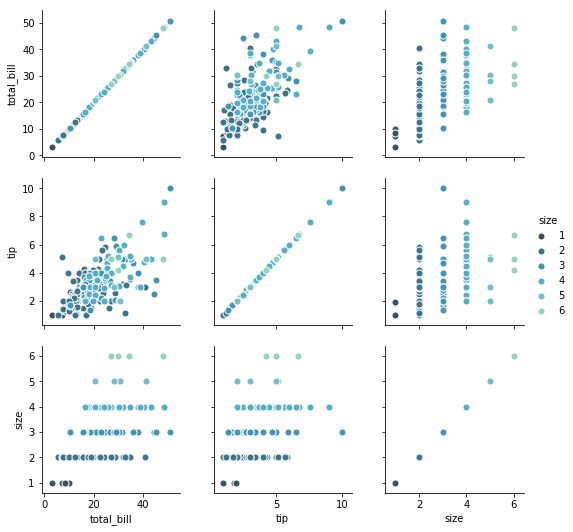

In [72]:
g=sns.PairGrid(tips,hue='size',palette='GnBu_d')
g.map(plt.scatter,s=50,edgecolor='white')
g.add_legend()

## 热力图

[[0.90699114 0.24610075 0.21736591]
 [0.7557071  0.42480001 0.10205853]
 [0.14796355 0.63821983 0.7964764 ]]


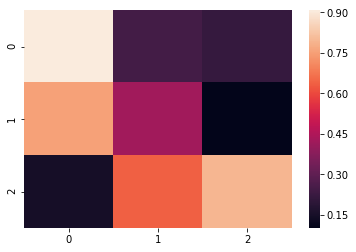

In [73]:
uniform_data=np.random.rand(3,3)
print(uniform_data)
heatmap=sns.heatmap(uniform_data)

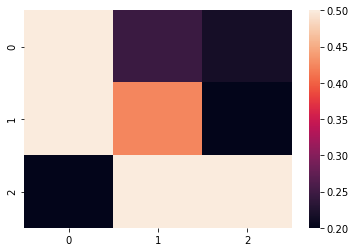

In [74]:
ax=sns.heatmap(uniform_data,vmin=0.2,vmax=0.5) #设定去色斑区间

[[ 0.024265   -2.04487942  0.39783092]
 [ 0.98510916  0.05234795  1.9795687 ]
 [ 1.09384569 -0.11758171 -0.683519  ]]


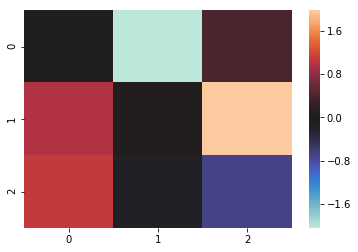

In [75]:
normal_data=np.random.randn(3,3)
print(normal_data)
ax=sns.heatmap(normal_data,center=0)

In [90]:
flights=sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


year       1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  \
month                                                                         
January     112   115   145   171   196   204   242   284   315   340   360   
February    118   126   150   180   196   188   233   277   301   318   342   
March       132   141   178   193   236   235   267   317   356   362   406   
April       129   135   163   181   235   227   269   313   348   348   396   
May         121   125   172   183   229   234   270   318   355   363   420   
June        135   149   178   218   243   264   315   374   422   435   472   
July        148   170   199   230   264   302   364   413   465   491   548   
August      148   170   199   242   272   293   347   405   467   505   559   
September   136   158   184   209   237   259   312   355   404   404   463   
October     119   133   162   191   211   229   274   306   347   359   407   
November    104   114   146   172   180   203   237 

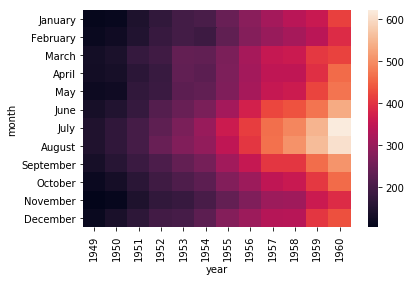

In [91]:
flights=pd.pivot(data=flights,index='month',columns='year',values='passengers')
print(flights)
ax=sns.heatmap(flights)

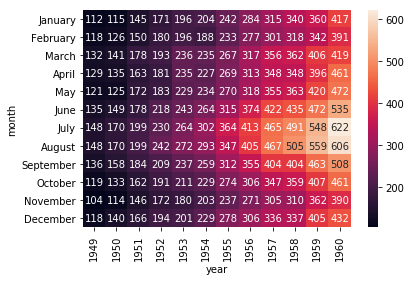

In [94]:
ax=sns.heatmap(flights,annot=True,fmt='d') #显示值 

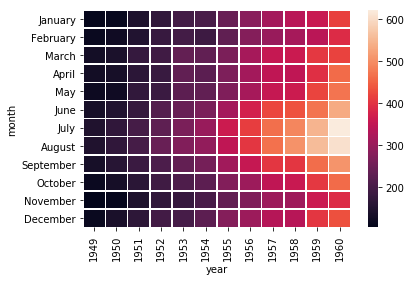

In [95]:
ax=sns.heatmap(flights,lw=.5) #加隔

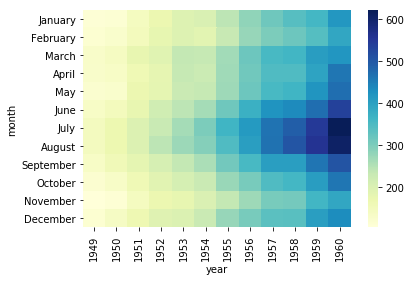

In [96]:
ax=sns.heatmap(flights,cmap='YlGnBu') #显示值 